<a href="https://colab.research.google.com/github/rahmatrians/scratching-naive-bayes/blob/main/TB2_MATH_TOOLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Kelompok 6 (Naive Bayes) :
- Rahmat Riansyah (41519010010)
- Ari Satria Wiratama  (41519010122)
- Abimanyu dwi satrio (41519010135)
- Dan Eliezer Ryan Andani (41519010120)
- Timotius Alvin (41519010003)

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#memasukan data latih
datalatih = pd.read_excel("data_test.xlsx") #emmanggil file data
datalatih.head() #menampilkan data dari baris teratas

,Warna,Tipe,Asal,Tercuri
0,merah,Sport,Domestik,ya
1,merah,Sport,Domestik,tidak
2,merah,Sport,Domestik,ya
3,kuning,Sport,Domestik,tidak
4,kuning,Sport,Import,ya
5,kuning,Suv,Import,tidak
6,kuning,Suv,Import,ya
7,kuning,Suv,Domestik,tidak
8,merah,Suv,Import,tidak
9,merah,Sport,Import,ya


In [5]:
#function untuk menyederhanakan data pada column
def cutting(data):
    seen = set()
    seen_add = seen.add
    return [x for x in data if not (x in seen or seen_add(x))]

In [341]:
# 1
tercuriCount =  datalatih.groupby(datalatih.columns[-1])[datalatih.columns[-1]].count()
print(tercuriCount)

Tercuri
tidak    5
ya       5
Name: Tercuri, dtype: int64


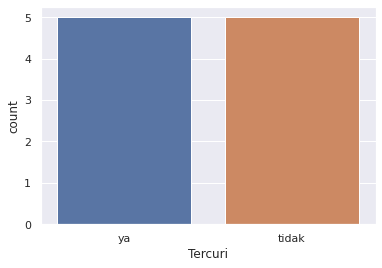

In [337]:
sns.countplot(x="Tercuri",data=datalatih)

In [344]:
tercuri = cutting(datalatih['Tercuri']) #menyederhanakan data pada column terakhir
tercuri

['ya', 'tidak']

In [346]:
lastColumn = datalatih.iloc[ :, -1:] #mengambil column terakhir untuk menentukan probabilitas

p1 = tercuriCount[0]/lastColumn.count() #menghitung probabilitas ke 1 yaitu n/jumlah
p2 = tercuriCount[1]/lastColumn.count() #menghitung probabilitas ke 2 yaitu n/jumlah

tercuriDf = pd.DataFrame({'name': tercuri, 'value': [p1,p2]}) #memasukkan hasil penghitungan ke dataframe
tercuriDf

,name,value
0,ya,Tercuri 0.5 dtype: float64
1,tidak,Tercuri 0.5 dtype: float64


In [348]:
# warnaCount = datalatih.groupby(datalatih.columns[1])[datalatih.columns[1]].count()
# print(len))

In [115]:

columnsData = []

for x in range(len(datalatih.columns)-1) :
  v = cutting(datalatih.iloc[:, x])
  tempData = []
  get = datalatih.groupby(datalatih.columns[x])[datalatih.columns[x]].count()
 
  for z in range(len(get)) :
    tempData.append(get.iloc[z])
 
  columnsData.append(tempData)
  
print(columnsData)

[[5, 5], [6, 4], [5, 5]]


In [104]:
# 2
# warnaCount = datalatih.groupby('Warna')['Warna'].count()
# print(warnaCount)
# print("\n")

# tipeCount =  datalatih.groupby('Tipe')['Tipe'].count()
# print(tipeCount)

# print("\n")

# asalCount =  datalatih.groupby('Asal')['Asal'].count()
# print(asalCount)

Warna
kuning    5
merah     5
Name: Warna, dtype: int64


Tipe
Sport    6
Suv      4
Name: Tipe, dtype: int64


Asal
Domestik    5
Import      5
Name: Asal, dtype: int64


In [327]:
def testQuestion(data) :
  lastCol = cutting(datalatih.iloc[ :, -1])
  totalColumn = len(datalatih.columns)-1

  prob1 = []
  prob2 = []

  result1 = []
  result2 = []
  
  print("-- probability 1 untuk kemungkinan " + lastCol[0] + "--")
  for x in range(len(data)) :
    newData = len(datalatih[(datalatih.iloc[ :, x] == data[x]) & (datalatih.iloc[ :, -1] == lastCol[0])])
    prob1.append(newData)
    print("result dari " + data[x] + " adalah " + str(newData))

  
  for u in range(len(data)) :
    result1.append(prob1[u] / tercuriCount[0])
  
  result1 = tercuriDf['value'][0] * np.prod(result1)
  result1 = "{:.0%}".format(float(result1))
  print("kemungkinan  probability '" + lastCol[0] + "' adalah " + str(result1))

    

  
  print('\n\n')

  print("-- probability 2 untuk kemungkinan " + lastCol[1] + "--")
  for x in range(len(data)) :
    newData = len(datalatih[(datalatih.iloc[ :, x] == data[x]) & (datalatih.iloc[ :, -1] == lastCol[1])])
    prob2.append(newData)
    print("result dari " + data[x] + " adalah " + str(newData))

  for u in range(len(data)) :
    result2.append(prob2[u] / tercuriCount[1])
  
  result2 = tercuriDf['value'][0] * np.prod(result2)
  result2 = "{:.0%}".format(float(result2))
  print("kemungkinan  probability '" + lastCol[1] + "' adalah " + str(result2))

  return final(result1, result2)


dataN = ['merah', 'Suv', 'Domestik']
testQuestion(dataN)

-- probability 1 untuk kemungkinan ya--
result dari merah adalah 3
result dari Suv adalah 1
result dari Domestik adalah 2
kemungkinan  probability 'ya' adalah 2%



-- probability 2 untuk kemungkinan tidak--
result dari merah adalah 2
result dari Suv adalah 3
result dari Domestik adalah 3
kemungkinan  probability 'tidak' adalah 7%


In [226]:

# merah = len(datalatih[(datalatih['Warna'] == 'merah') & (datalatih['Tercuri'] == 'ya')])
# print(merah)

# print("\n")

# suv = len(datalatih[(datalatih['Tipe'] == 'Suv') & (datalatih['Tercuri'] == 'ya')])
# print(suv)

# print("\n")

# domestik = len(datalatih[(datalatih['Asal'] == 'Domestik') & (datalatih['Tercuri'] == 'ya')])

# print(domestik)

3


1


2


In [318]:
# ya1 = merah/tercuriCount[1]
# ya2 = suv/tercuriCount[1]
# ya3 = domestik/tercuriCount[1]

# resultYa = tercuriDf['value'][0] * ya1 * ya2 * ya3
# print(resultYa)


Tercuri    0.024
dtype: float64


In [17]:
# merah = len(datalatih[(datalatih['Warna'] == 'merah') & (datalatih['Tercuri'] == 'tidak')])
# print(merah)

# print("\n")

# suv = len(datalatih[(datalatih['Tipe'] == 'Suv') & (datalatih['Tercuri'] == 'tidak')])
# print(suv)

# print("\n")

# domestik = len(datalatih[(datalatih['Asal'] == 'Domestik') & (datalatih['Tercuri'] == 'tidak')])

# print(domestik)

2


3


3


In [18]:
# no1 = merah/tercuriCount[1]
# no2 = suv/tercuriCount[1]
# no3 = domestik/tercuriCount[1]

# resultNo = tercuriDf['value'][1] * no1 * no2 * no3
# print(resultNo)

Tercuri    0.072
dtype: float64
